# Fudan RPML Assignment1: Machine Learning Meets Fashion

![Machine Learning Meets Fashion](./img/ml_meets_fashion.jpg)

*Your name and Student ID: [Name], [Student ID]*

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.*

In this assignment, you will use what you have learned to tackle some pratical problems. Fashion MNIST dataset[1] is the MNIST-like fashion product database for image classification you will play with this time. It originally consists of a training set of 60000 examples and a test set of 10000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

To make this task more realistic, we selected 14600 labeled examples from the training set and did a little processing. You have to do this image classifictaion task with our new dataset. 

You have to impletement several standard classification methods in the './fudanPRML' folder:
- K-nearest Neighbor (15 points)
- Softmax (15 points)
- Neural Network (30 points)    

and then do your exploration (30 points).

You can only use some basic python libraries in your experiment like numpy, paddle(without using the paddle.nn), matplotlib and so on. And please write down the version with them in the './requirements.txt' file.

## 1. Setup

当导入了自己写的python模块时，在ipynb文件里import一次之后，即使修改了你的python模块，重新运行import其实还是用的之前的python模块（因为已经将该模块在第一次导入时存在了内存里，第二次import没效果），这时需要重启kenel才能导入修改过的python模块。

首先自动加载导入的python模块，保证你每次在ipynb里使用的模块是最新版本，所以在你修改了模块代码之后，不需要重新刷新你的kenel。

并进行一些其他的设置



In [43]:
# setup code
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import paddle

paddle.device.get_device()
paddle.set_device(paddle.device.get_device())

Place(cpu)

In [44]:
import numpy as np
dataset_path = './dataset'

X_train = np.load(dataset_path + '/X_train.npy')
y_train = np.load(dataset_path + '/y_train.npy')
X_test = np.load(dataset_path + '/X_test.npy')
y_test = np.load(dataset_path + '/y_test.npy')

In [45]:
label_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

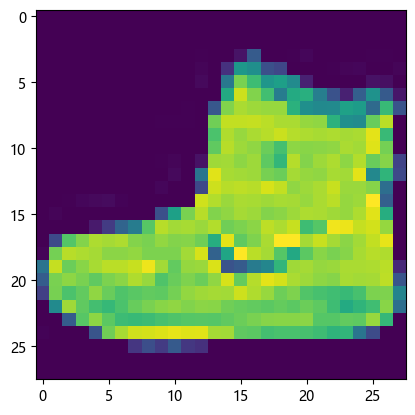

In [46]:
%matplotlib inline
# 可以将matplotlib的图表直接嵌入到Notebook之中，或者使用指定的界面库显示图表
from matplotlib import pyplot as plt

plt.imshow(X_train[0].reshape(28,28))

## 2. Exploratory Data Analysis (5 points)

Your may have to explore the dataset and do some analysis first.

训练集中各类别条目数量:
 [6000, 4000, 1000, 1000, 1000, 1000, 200, 200, 100, 100]
观察可知存在类别不均衡的问题


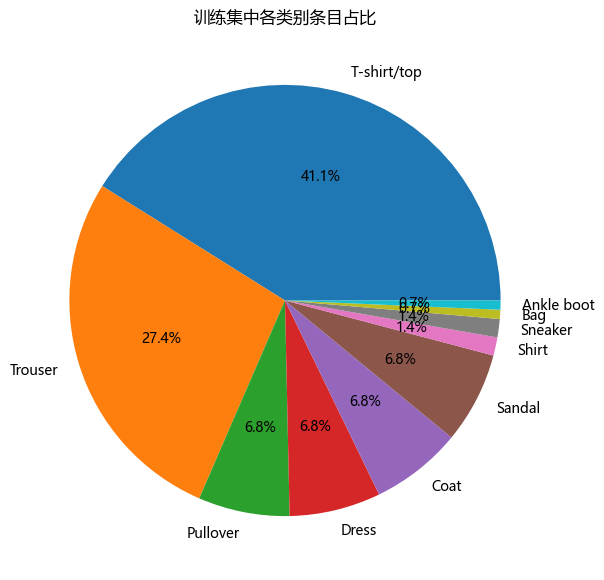

In [47]:
label_summary = [0 for i in range(10)]
for label in y_train:
    label_summary[label] = label_summary[label] + 1
print('训练集中各类别条目数量:\n',label_summary)
print('观察可知存在类别不均衡的问题')
plt.figure(figsize=(7,7))
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  #指定字体为雅黑，解决文字乱码问题
plt.title('训练集中各类别条目占比')
plt.pie(label_summary,labels=label_name,autopct="%1.1f%%")
plt.show()


## 3. Methodology

In [49]:
# Please open the corresponding file and complete it first
# The codebase is organized in a sklearn style
# you have to finish the 'fit' and 'predict' function and do your experiment in this .ipynb file
from fudanPRML.neighbors.k_nearest_neighbor import KNearestNeighbor
from fudanPRML.linear_model.softmax import SoftmaxClassifier
from fudanPRML.neural_network.mlp import MLPClassifier

### K-nearest Neighbor (15 points)

In [52]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
k_to_accuracies = {}
for k in k_choices:
    k_to_accuracies[k] = []
    for i in range(num_folds):
        clf = KNearestNeighbor()
        clf.fit(np.concatenate(X_train_folds[0:i]+X_train_folds[i+1:],axis = 0),np.concatenate(y_train_folds[0:i]+y_train_folds[i+1:],axis = 0))
        dists = clf.compute_distances_two_loops(X_train_folds[i])
        y_test_pred = clf.predict_labels(dists,k)
        num_correct = np.sum(y_test_pred == y_train_folds[i])
        accuracy = float(num_correct) / len(y_train_folds[i])
        k_to_accuracies[k] = k_to_accuracies[k] + [accuracy]


# 打印出计算的精度
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy),end = '\t')
    print()

KeyboardInterrupt: 

### Softmax (15 points)

### Neural Network (30 points)

### Your Exploration (30 points)

## 4. Conclusion (5 points)

## Reference
List your references here.

[1] Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv: https://arxiv.org/abs/1708.07747, GitHub: https://github.com/zalandoresearch/fashion-mnist